In [1]:
from tensorflow.keras.applications.vgg19 import VGG19, preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from glob import glob
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
IMAGE_SIZE=[256,256]

In [3]:
train_path="./data/train"
test_path="./data/test"
val_path="./data/val"

In [4]:
vgg = VGG19(input_shape=IMAGE_SIZE + [3], weights="imagenet", include_top=False)

In [5]:
for layer in vgg.layers:
    layer.trainable = False

In [6]:
folders = glob("./data/train/*")
print(len(folders))

4


In [7]:
x = tf.keras.layers.Flatten()(vgg.output)
predict = tf.keras.layers.Dense(len(folders), activation="softmax")(x)
model = tf.keras.models.Model(inputs=vgg.input, outputs=predict)
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 256, 256, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 256, 256, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 256, 256, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 128, 128, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 128, 128, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 128, 128, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 64, 64, 128)       0     

In [8]:
model.compile(loss="categorical_crossentropy",
             optimizer="adam",
             metrics=["accuracy"])

In [9]:
trainDatagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    rotation_range=40,
    width_shift_range=0.2,
    shear_range=0.2,
    horizontal_flip=True,
)
testDatagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    rotation_range=40,
    width_shift_range=0.2,
    shear_range=0.2,
    horizontal_flip=True,
)
valDatagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    rotation_range=40,
    width_shift_range=0.2,
    shear_range=0.2,
    horizontal_flip=True,
)

In [10]:
train_set = trainDatagen.flow_from_directory(train_path, class_mode="categorical", batch_size=20)
test_set = testDatagen.flow_from_directory(test_path, class_mode="categorical", batch_size=20)
val_set = valDatagen.flow_from_directory(val_path, class_mode="categorical", batch_size=20)

Found 1951 images belonging to 4 classes.
Found 106 images belonging to 4 classes.
Found 253 images belonging to 4 classes.


In [11]:
histroy = model.fit(train_set, 
          epochs=10,
          steps_per_epoch=16, 
          validation_data=val_set,
         )

Epoch 1/10
16/16 [==============================] - 121s 8s/step - loss: 14.4277 - accuracy: 0.3801 - val_loss: 7.7894 - val_accuracy: 0.6403
Epoch 2/10
16/16 [==============================] - 116s 7s/step - loss: 4.7050 - accuracy: 0.7022 - val_loss: 2.9448 - val_accuracy: 0.7549
Epoch 3/10
16/16 [==============================] - 116s 7s/step - loss: 2.5773 - accuracy: 0.8039 - val_loss: 3.7646 - val_accuracy: 0.7510
Epoch 4/10
16/16 [==============================] - 117s 7s/step - loss: 3.8315 - accuracy: 0.7476 - val_loss: 3.3624 - val_accuracy: 0.7945
Epoch 5/10
16/16 [==============================] - 115s 7s/step - loss: 2.6295 - accuracy: 0.8241 - val_loss: 3.7088 - val_accuracy: 0.7984
Epoch 6/10
16/16 [==============================] - 129s 8s/step - loss: 2.8981 - accuracy: 0.8251 - val_loss: 3.4159 - val_accuracy: 0.8261
Epoch 7/10
16/16 [==============================] - 133s 8s/step - loss: 3.6487 - accuracy: 0.7860 - val_loss: 2.0553 - val_accuracy: 0.8379
Epoch 8/10
1

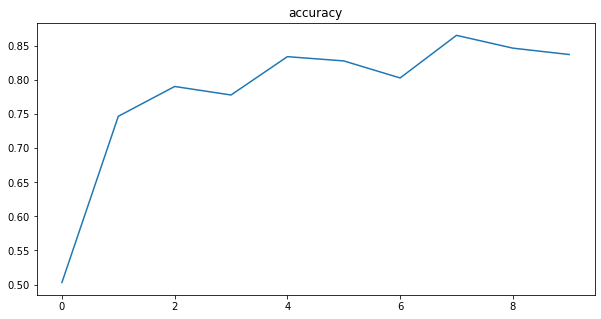

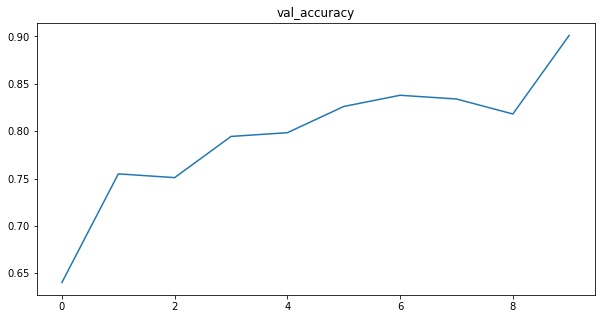

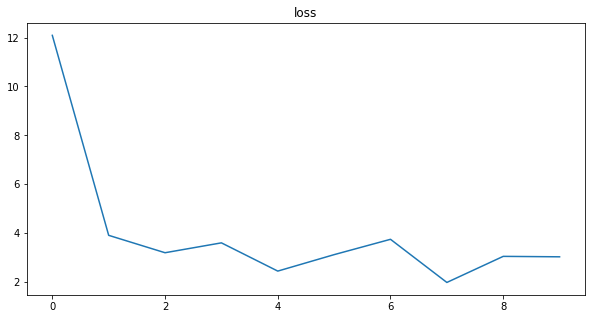

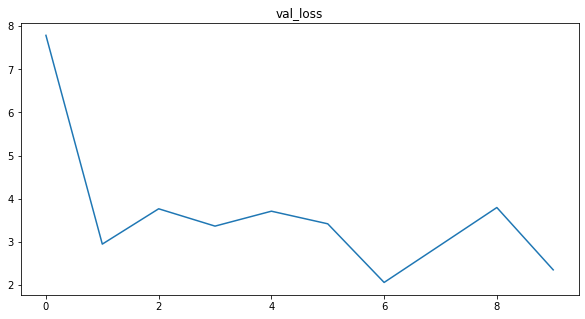

In [24]:
params = ['accuracy','val_accuracy','loss','val_loss']

for param in params:
    plt.figure(figsize=(10, 5))
    data = histroy.history[param]
    plt.plot(data)
    plt.title(param)

In [26]:
model.evaluate(test_set)

6/6 [==============================] - 20s 3s/step - loss: 2.4856 - accuracy: 0.8585


[2.485610008239746, 0.8584905862808228]

In [28]:
model.save("vgg19-85.h5")